In [1]:
# Imports section
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import statistics 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# Read the file in the format given
text=""
nLines=0
nAttributes=0
nClasses=0
attributesName = []
data = []
dataPerAttribute = []
classes = []
try:
    with open("archivo.txt","r") as file:
        count=0
        for line in file:
            if count < 3:
                if count == 0:
                    nLines = int(line.strip())
                else:
                    if count == 1:
                        nAttributes = int(line.strip())
                        for i in range(1,nAttributes+1):
                            attributesName.append("att"+str(i))
                            dataPerAttribute.append([])
                    else:
                        if count == 2:
                            nClasses = int(line.strip())
            else:
                split_string_S = line.strip().split(',')
                
                count_split = 0
                split_string_n = []
                for split in split_string_S:
                    if count_split >= nAttributes:
                        split_string_n.append(int(split))
                    else:
                        split_string_n.append(float(split))
                    count_split += 1
                    
                data.append(split_string_n)
                classes.append(split_string_n[nAttributes])
                n_attribute = 0
                for attribute in split_string_n:
                    if n_attribute >= nAttributes:
                        break
                    else:
                        dataPerAttribute[n_attribute].append(attribute)
                        n_attribute += 1
            count += 1
        print("EOF reached")
except FileNotFoundError:
    text="Archivo no existe"
    exit()
finally:
    file.close()
    # print(str(nLines) + "\n")
    # print(str(nAttributes) + "\n")
    # print(str(nClasses) + "\n")
    # print(attributesName)
    # print(data)

EOF reached


In [3]:
# Turning the data into a DataFrame python object
columns_ = attributesName[:]
columns_.append("target")

dataFrame = pd.DataFrame(data=data, columns=columns_)
dataFrame

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,target
0,140.0,125.0,0.0,0.0,0.000000,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188.0,133.0,0.0,0.0,0.000000,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105.0,139.0,0.0,0.0,0.000000,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34.0,137.0,0.0,0.0,0.000000,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39.0,111.0,0.0,0.0,0.000000,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,225.0,58.0,0.0,0.0,0.000000,0.333334,0.421637,0.444445,0.344265,8.333333,5.555555,14.111111,5.333334,-8.333333,17.333334,-9.000000,14.111111,0.622222,-2.068564,6
416,170.0,154.0,0.0,0.0,0.000000,0.111111,0.172133,0.055556,0.136083,0.074074,0.000000,0.222222,0.000000,-0.222222,0.444444,-0.222222,0.222222,0.222222,-2.094395,6
417,238.0,61.0,0.0,0.0,0.000000,0.666667,0.471405,0.722222,0.490653,8.777778,5.888889,14.333333,6.111111,-8.666667,16.666666,-8.000000,14.333333,0.588823,-2.121837,6
418,189.0,62.0,0.0,0.0,0.000000,0.388889,0.250924,0.444444,0.344265,7.629630,5.000000,13.111111,4.777778,-7.888889,16.444445,-8.555555,13.111111,0.635938,-2.066953,6


In [4]:
# Separating out the features
x = dataFrame.loc[:, attributesName].values
# Separating out the target
y = dataFrame.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [5]:
# Creating the Principal Components
pcn = int(input('Number of principal components:'))
if pcn > nAttributes:
    print(str(nAttributes) + " is the maximum number of principal components")
    pcn = min([nAttributes,pcn])
else:
    if pcn <= 0:
        print("1 is the minimum number of principal components")
        pcn = max([1,pcn])
        
print ("Creating PCA with " + str(pcn) + " components")
pca = PCA(n_components=pcn)
principalComponents = pca.fit_transform(x)
pc_names = []
for i in range(1,pcn+1):
    pc_names.append("principal component "+ str(i))

principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_names)
principalDf 

Number of principal components:10
Creating PCA with 10 components


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-2.299677,-0.343837,-1.036211,-0.321205,-0.060937,-0.057857,-0.203537,0.267093,-0.334486,0.113023
1,-2.371925,-0.403867,-1.035717,0.123448,0.295759,-0.181934,0.080185,0.200005,-0.314107,0.101003
2,-2.389590,-0.266572,-0.770185,-0.495633,-0.251245,0.063266,-0.559136,0.238570,-0.461914,0.103512
3,-2.514506,-0.096834,-0.574882,-1.135091,-0.784593,0.285231,-1.009104,0.241223,-0.490806,0.077347
4,-2.236746,-0.124341,-0.914775,-1.225178,-0.787284,0.239401,-0.870827,0.379662,-0.257430,-0.002796
...,...,...,...,...,...,...,...,...,...,...
415,-1.307175,-0.558173,-2.131070,-0.175959,0.190861,-0.433279,1.093097,0.207017,0.119553,0.118490
416,-2.480510,-0.440099,-0.668901,0.515578,0.769818,-0.010862,-0.690503,0.771565,-0.197321,-0.024439
417,-1.262135,-0.478888,-2.066865,-0.002415,0.337953,-0.427636,1.113872,0.188592,0.262844,0.119640
418,-1.403244,-0.494110,-2.024198,-0.459423,-0.073273,-0.330329,0.834267,0.192290,0.054330,0.083206


In [6]:
#joining the standarized data with the targets
finalDf = pd.concat([principalDf, dataFrame[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,target
0,-2.299677,-0.343837,-1.036211,-0.321205,-0.060937,-0.057857,-0.203537,0.267093,-0.334486,0.113023,0
1,-2.371925,-0.403867,-1.035717,0.123448,0.295759,-0.181934,0.080185,0.200005,-0.314107,0.101003,0
2,-2.389590,-0.266572,-0.770185,-0.495633,-0.251245,0.063266,-0.559136,0.238570,-0.461914,0.103512,0
3,-2.514506,-0.096834,-0.574882,-1.135091,-0.784593,0.285231,-1.009104,0.241223,-0.490806,0.077347,0
4,-2.236746,-0.124341,-0.914775,-1.225178,-0.787284,0.239401,-0.870827,0.379662,-0.257430,-0.002796,0
...,...,...,...,...,...,...,...,...,...,...,...
415,-1.307175,-0.558173,-2.131070,-0.175959,0.190861,-0.433279,1.093097,0.207017,0.119553,0.118490,6
416,-2.480510,-0.440099,-0.668901,0.515578,0.769818,-0.010862,-0.690503,0.771565,-0.197321,-0.024439,6
417,-1.262135,-0.478888,-2.066865,-0.002415,0.337953,-0.427636,1.113872,0.188592,0.262844,0.119640,6
418,-1.403244,-0.494110,-2.024198,-0.459423,-0.073273,-0.330329,0.834267,0.192290,0.054330,0.083206,6


In [7]:
##Building models for the Ensemble
folds = int(input("Enter number of K-Folds for Cross Validation: "))
neighbors = int(input("Enter value of K-Nearest Neighbors: "))
kk = KNeighborsClassifier(n_neighbors=neighbors)
nb = GaussianNB()
hLayers = int(input("Enter number of Hidden Layers for the Neural Network: "))
layersSize=[]
for i in range(1,hLayers+1):
    layersSize.append(int(input("Number of perceptrons for the "+str(i)+"-th layer: ")))
activationFunction=input("activation{identity, logistic, tanh, relu}: ")
epochs = int(input("Number of iterations for the Neural Network: "))
moment = float(input("Momentum for the Neural Network[0-1]: "))
nn = MLPClassifier(hidden_layer_sizes=layersSize,solver='sgd',activation=activationFunction,max_iter=epochs,momentum=moment)

Enter number of K-Folds for Cross Validation: 5
Enter value of K-Nearest Neighbors: 7
Enter number of Hidden Layers for the Neural Network: 3
Number of perceptrons for the 1-th layer: 10
Number of perceptrons for the 2-th layer: 15
Number of perceptrons for the 3-th layer: 10
activation{identity, logistic, tanh, relu}: tanh
Number of iterations for the Neural Network: 2500
Momentum for the Neural Network[0-1]: 0.9


In [8]:
scores_KK = cross_val_score(kk, principalComponents, y.ravel(), cv=folds)
scores_NB = cross_val_score(nb, principalComponents, y.ravel(), cv=folds)
scores_NN = cross_val_score(nn, principalComponents, y.ravel(), cv=folds)
split_names= []
model_names =['K-Nearest Neighbors','Naive Bayes','Neural Network']
for i in range(1,folds+1):
    split_names.append("Fold "+str(i))
kk_df = pd.DataFrame(scores_KK,
                   columns=['K-Nearest Neighbors'],
                     index=split_names)
nb_df = pd.DataFrame(scores_NB,
                   columns=['Naive Bayes'],
                     index=split_names)
nn_df = pd.DataFrame(scores_NN,
                   columns=['Neural Network'],
                     index=split_names)
avg_models = [np.mean(scores_KK),
             np.mean(scores_NB),
             np.mean(scores_NN)]
avg_df = pd.DataFrame(avg_models,
                      columns=['Normal Cross Validation Average'],index=model_names)
kk_df

,K-Nearest Neighbors
Fold 1,0.869048
Fold 2,0.880952
Fold 3,0.904762
Fold 4,0.916667
Fold 5,0.904762


In [9]:
nb_df

,Naive Bayes
Fold 1,0.738095
Fold 2,0.904762
Fold 3,0.940476
Fold 4,0.845238
Fold 5,0.880952


In [10]:
nn_df

,Neural Network
Fold 1,0.869048
Fold 2,0.916667
Fold 3,0.880952
Fold 4,0.869048
Fold 5,0.940476


In [11]:
avg_df

,Normal Cross Validation Average
K-Nearest Neighbors,0.895238
Naive Bayes,0.861905
Neural Network,0.895238


In [12]:
#Creating ensemble with normal cross validation
eclf = VotingClassifier(
        estimators=[('kn', kk), ('nb', nb), ('nnet', nn)],
         voting='hard')
eclf_scores = cross_val_score(eclf, principalComponents, y.ravel(), scoring='accuracy', cv=folds)
eclf_df = pd.DataFrame(eclf_scores,
                   columns=['Ensemble'],
                     index=split_names)
print("Accuracy: %0.4f (+/- %0.4f)" % (eclf_scores.mean(), eclf_scores.std() * 2))
eclf_df

Accuracy: 0.9048 (+/- 0.0476)


,Ensemble
Fold 1,0.857143
Fold 2,0.916667
Fold 3,0.916667
Fold 4,0.916667
Fold 5,0.916667


In [13]:
#Creating ensemble with stratified cross validation
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train.ravel())
    return model.score(x_test,y_test)
KFolds = StratifiedKFold(n_splits=folds)
eclf_scores= []
for train_index,test_index in KFolds.split(X=principalComponents,y=y):
    X_train,X_test,y_train,y_test = principalComponents[train_index],principalComponents[test_index],y[train_index],y[test_index]
    eclf_scores.append(get_score(eclf,X_train,X_test,y_train,y_test))
eclf_df = pd.DataFrame(eclf_scores,
                   columns=['Ensemble'],
                     index=split_names)
print("Accuracy: %0.4f (+/- %0.4f)" % (np.mean(eclf_scores), statistics.stdev(eclf_scores) * 2))
eclf_df

Accuracy: 0.9024 (+/- 0.0702)


,Ensemble
Fold 1,0.845238
Fold 2,0.928571
Fold 3,0.916667
Fold 4,0.928571
Fold 5,0.892857


C:\ProgramData\Miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
C:\ProgramData\Miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
C:\ProgramData\Miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
C:\ProgramData\Miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax

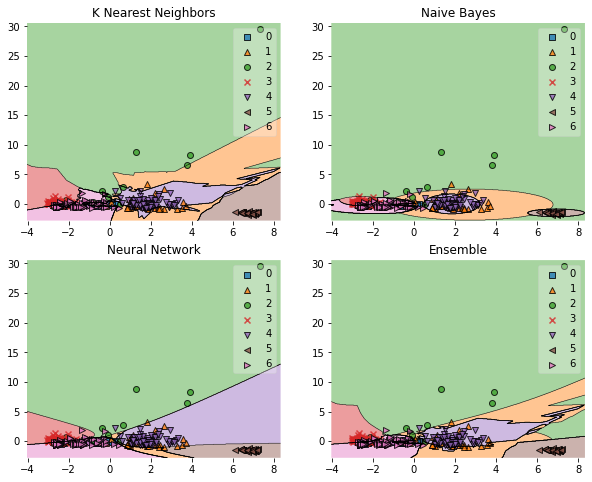

In [14]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['K Nearest Neighbors', 'Naive Bayes', 'Neural Network', 'Ensemble']
for clf, lab, grd in zip([kk, nb, nn, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    x = finalDf.loc[:,['principal component 1','principal component 2']].values
    clf.fit(x, y.ravel())
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x, y=y.ravel(), clf=clf)
    plt.title(lab)

In [ ]:
 y_pred = cross_val_predict(lasso, X, y, cv=3)